In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

default_hatch_patterns = ["o" , "x", "*" , "." , "." , "\\" , "O", ".", "*"]
default_color = "0.80"
default_box_width = 14
default_box_marker = "|"
default_box_marker_size = 20
default_box_marker_alpha = 0.8
default_grid_color = "0.8"
dpi=400

df = pd.read_csv("TYU07_corrigido.csv").drop('Unnamed: 0', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
Curso           9980 non-null object
Turno           9974 non-null object
Ensino médio    9971 non-null object
Opinião         9975 non-null object
Renda           9974 non-null float64
Nota ENEM       10000 non-null int64
IAA             10000 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 547.0+ KB


## Questão 3 
Analisem a variável Curso. Qual é o predominante? JUSTIFIQUEM!

In [4]:
df["Curso"].value_counts()

Química       2297
Produção      2068
Mecânica      1874
Elétrica      1474
Computação    1294
Civil          973
Name: Curso, dtype: int64

## Questão 4
Analisem a variável Turno. Qual é o predominante? JUSTIFIQUEM!

In [5]:
df["Turno"].value_counts()

Noturno     4099
Integral    3238
Diurno      2637
Name: Turno, dtype: int64

## Questão 5
Analisem a variável Ensino médio. A direção da TYU acredita que a maioria absoluta dos seus alunos cursou o ensino médio predominantemente em escolas particulares. Há evidência de que isso realmente acontece? JUSTIFIQUEM!

In [6]:
df["Ensino médio"].value_counts()

Somente em pública           5569
Maior parte em particular    1664
Somente em particular        1457
Maior parte em pública       1281
Name: Ensino médio, dtype: int64

In [7]:
print("{} dos {} alunos cursaram predominantemente o ensino médio em escolas particulares. Isso resulta em {:.2f}% do total.".format(int(df["Ensino médio"].str.count("Maior parte em particular").sum()+df["Ensino médio"].str.count("Somente em particular").sum()), df["Ensino médio"].count(), 100 * (df["Ensino médio"].str.count("Maior parte em particular").sum()+df["Ensino médio"].str.count("Somente em particular").sum())/df["Ensino médio"].count()))


3121 dos 9971 alunos cursaram predominantemente o ensino médio em escolas particulares. Isso resulta em 31.30% do total.


## Questão 6
Analisem a variável Opinião. Os alunos da TYU estão satisfeitos com os seus cursos? JUSTIFIQUEM!

In [8]:
df["Opinião"].value_counts()

Muito satisfeito      3718
Satisfeito            2184
Insatisfeito          1677
Indiferente           1499
Muito insatisfeito     897
Name: Opinião, dtype: int64

In [9]:
print("Sim, {:.1f}% dos alunos se mostraram satisfeitos ou muito satisfeitos, e apenas {:.1f}% estão insatisfeitos ou muito insatisfeitos".format(100*(df["Opinião"].str.count("Muito satisfeito").sum() + df["Opinião"].str.count("Satisfeito").sum())/df["Opinião"].count(), 100*(df["Opinião"].str.count("Insatisfeito").sum() + df["Opinião"].str.count("Muito insatisfeito").sum())/df["Opinião"].count()))

Sim, 59.2% dos alunos se mostraram satisfeitos ou muito satisfeitos, e apenas 25.8% estão insatisfeitos ou muito insatisfeitos


## Questão 7
Façam uma descrição da variável Renda. Em estudos anteriores pelo menos três quartos dos alunos de engenharia da TYU tinham renda familiar inferior a 2700. Os dados atuais confirmam isso? Lembrem-se de que o salário mínimo do Brasil em 2018 (referência para Pindorama) vale R$ 965

In [19]:
df["Renda"].describe()

count    9974.000000
mean        1.781226
std         1.180862
min         1.000000
25%         1.100000
50%         1.360000
75%         2.000000
max        24.560000
Name: Renda, dtype: float64

AttributeError: Cannot access callable attribute 'div' of 'DataFrameGroupBy' objects, try using the 'apply' method

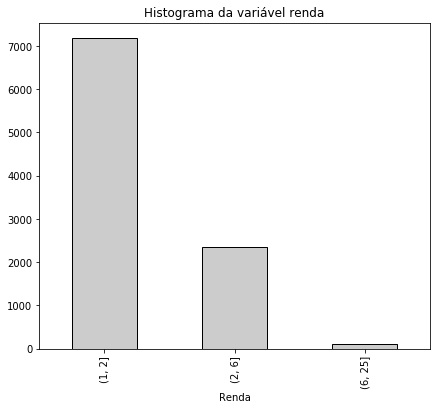

In [28]:
#bins = list(np.arange(0, 26, 2))
bins = [1, 2, 6, 25]
df.groupby([pd.cut(df["Renda"], bins)])["Renda"].count().plot(kind="bar", figsize=(7,6), title="Histograma da variável renda", edgecolor = "black", color=default_color)
df1 = df.groupby([pd.cut(df["Renda"], bins)])
df1a = df1.div(0.01*df1.sum(axis=1), axis=0)
df1a

plt.xlabel("Faixa salárial em número de salários mínimos")
plt.ylabel("Frequência absoluta")
# Salva figura na pasta dedicada
plt.savefig('Figuras\hist_tyu_renda.png', bbox_inches='tight')


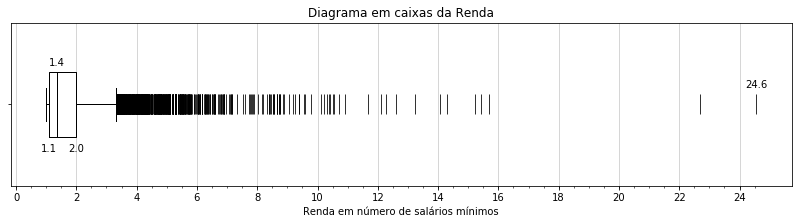

In [21]:
fig = plt.figure(1, figsize=(default_box_width, 3))
ax = fig.add_subplot(111)

bplot = ax.boxplot(df["Renda"].dropna(), vert=False, widths=0.4)
ax.set
ax.set_yticklabels([""])
ax.set_xlabel("Renda em número de salários mínimos")
ax.set_title("Diagrama em caixas da Renda")

ax.set_xticks(np.arange(0, 25, 2))
ax.set_xticks(np.arange(0, 25, 0.5), minor=True)
ax.grid(axis="x", color=default_grid_color)

for line in bplot['medians']:
    x, y = line.get_xydata()[1]
    plt.text(x, y+0.04, '%.1f' % x, horizontalalignment='center') # draw above, centered
    line.set(color="black")

for line in bplot['boxes']:
    x, y = line.get_xydata()[0] # bottom of left line
    plt.text(x,y-0.04, '%.1f' % x, horizontalalignment='center', verticalalignment='top')      # below
    x, y = line.get_xydata()[3] # bottom of right line
    plt.text(x,y-0.04, '%.1f' % x, horizontalalignment='center', verticalalignment='top')      # below
        
for flier in bplot['fliers']:
    flier.set(marker=default_box_marker, alpha=default_box_marker_alpha, markersize=default_box_marker_size)
    y = 1.03
#     x = min(flier.get_xydata()[:,0])
#     plt.text(x,y+0.07, '%.1f' % x, horizontalalignment='center')      # above
    x = max(flier.get_xydata()[:,0])
    plt.text(x,y+0.07, '%.1f' % x, horizontalalignment='center')      # above

    
plt.savefig('Figuras\Q7.png', bbox_inches='tight', dpi=dpi)

In [11]:
print("Correto, {} ou {:.1f}% dos estudantes possuem renda inferior a R$ 2700".format(sum(df["Renda"] < 2700/965), 100*sum(df["Renda"] < 2700/965)/df["Opinião"].count()))

Correto, 8785 ou 88.1% dos estudantes possuem renda inferior a R$ 2700


## Questão 8
Façam uma descrição da variável Nota no ENEM. Admite-se que pelo menos 75% dos alunos dos cursos da TYU obtiveram nota maior ou igual a 420 no ENEM de Pindorama. Os dados atuais confirmam isso? JUSTIFIQUEM! (usando as tabelas de frequências, gráficos, e medidas usadas na descrição).

In [12]:
df["Nota ENEM"].describe()

count    10000.000000
mean       505.193900
std        151.477462
min         18.000000
25%        404.000000
50%        502.000000
75%        605.000000
max       1069.000000
Name: Nota ENEM, dtype: float64

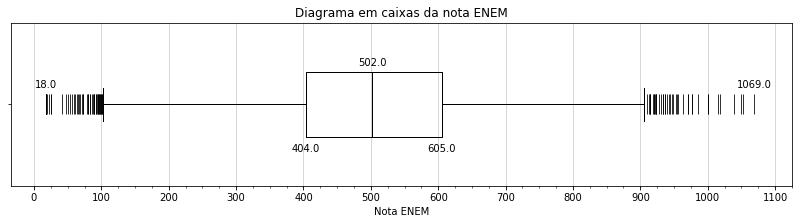

In [13]:
# bplot = df["Nota ENEM"].boxplot(kind="box", vert=False, grid=True, figsize=(11,3))

fig = plt.figure(1, figsize=(default_box_width, 3))
ax = fig.add_subplot(111)

bplot = ax.boxplot(df["Nota ENEM"], vert=False, widths=0.4)
ax.set_yticklabels([""])
ax.set_xlabel("Nota ENEM")
ax.set_title("Diagrama em caixas da nota ENEM")
# ax.set_xbound(lower=0, upper=1150)
ax.set_xticks(np.arange(0, 1150, 100))
ax.set_xticks(np.arange(0, 1150, 25), minor=True)
ax.grid(axis="x", color=default_grid_color)

for line in bplot['medians']:
    x, y = line.get_xydata()[1]
    plt.text(x, y+0.04, '%.1f' % x, horizontalalignment='center') # draw above, centered
    line.set_color("black")

for line in bplot['boxes']:
    x, y = line.get_xydata()[0] # bottom of left line
    plt.text(x,y-0.04, '%.1f' % x, horizontalalignment='center', verticalalignment='top')      # below
    x, y = line.get_xydata()[3] # bottom of right line
    plt.text(x,y-0.04, '%.1f' % x, horizontalalignment='center', verticalalignment='top')      # below
        
for flier in bplot['fliers']:
    flier.set(marker=default_box_marker, alpha=default_box_marker_alpha, markersize=default_box_marker_size)
    y = 1.03
    x = min(flier.get_xydata()[:,0])
    plt.text(x,y+0.07, '%.1f' % x, horizontalalignment='center')      # above
    x = max(flier.get_xydata()[:,0])
    plt.text(x,y+0.07, '%.1f' % x, horizontalalignment='center')      # above
    
    
plt.savefig('Figuras\Q8.png', bbox_inches='tight', dpi=dpi)
    

In [14]:
print("Esta afirmação é falsa, visto que apenas {:.1f}% dos alunos obtiveram nota maior ou igual a 420 no ENEM".format(100*sum(df["Nota ENEM"] >= 420)/df["Nota ENEM"].count()))

Esta afirmação é falsa, visto que apenas 71.5% dos alunos obtiveram nota maior ou igual a 420 no ENEM


## Questão 9
Façam uma descrição da variável IAA. Há uma crença que o IAA da maioria dos alunos é superior a 5. Os dados atuais confirmam isso? JUSTIFIQUEM! (usando as tabelas de frequências, gráficos, e medidas usadas na descrição).

In [15]:
df["IAA"].describe()

count    10000.000000
mean         4.679870
std          1.018379
min          1.161000
25%          3.999000
50%          4.656000
75%          5.353250
max          8.771000
Name: IAA, dtype: float64

In [28]:
df["IAA"].where(df["IAA"]<=5).dropna().count()/df["IAA"].dropna().count()

0.63

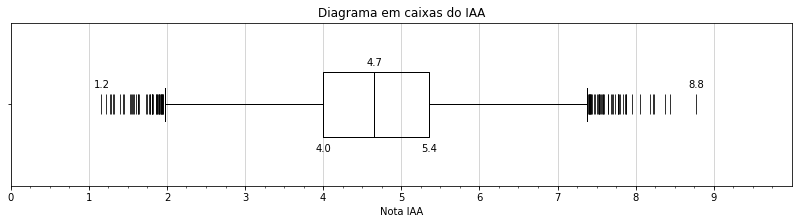

In [20]:
fig = plt.figure(1, figsize=(default_box_width, 3))
ax = fig.add_subplot(111)

bplot = ax.boxplot(df["IAA"], vert=False, widths=0.4)
ax.set_yticklabels([""])
ax.set_xlabel("Nota IAA")
ax.set_title("Diagrama em caixas do IAA")
ax.set_xbound((0,10))
ax.set_xticks(np.arange(0, 10, 1))
ax.set_xticks(np.arange(0, 10, 0.25), minor=True)
ax.grid(axis="x", color=default_grid_color)

for line in bplot['medians']:
    x, y = line.get_xydata()[1]
    plt.text(x, y+0.04, '%.1f' % x, horizontalalignment='center') # draw above, centered
    line.set(color="black")

for line in bplot['boxes']:
    x, y = line.get_xydata()[0] # bottom of left line
    plt.text(x,y-0.04, '%.1f' % x, horizontalalignment='center', verticalalignment='top')      # below
    x, y = line.get_xydata()[3] # bottom of right line
    plt.text(x,y-0.04, '%.1f' % x, horizontalalignment='center', verticalalignment='top')      # below
        
for flier in bplot['fliers']:
    flier.set(marker=default_box_marker, alpha=default_box_marker_alpha, markersize=default_box_marker_size)
    y = 1.03
    x = min(flier.get_xydata()[:,0])
    plt.text(x,y+0.07, '%.1f' % x, horizontalalignment='center')      # above
    x = max(flier.get_xydata()[:,0])
    plt.text(x,y+0.07, '%.1f' % x, horizontalalignment='center')      # above

    
plt.savefig('Figuras\Q9.png', bbox_inches='tight', dpi=dpi)

In [17]:
print("Esta afirmação é falsa, visto que a mediana está localizada em {:.2f} e apenas {:.1f}% dos alunos possuem IAA superior a 5".format(df["IAA"].median(), 100 * sum(df["IAA"] > 5)/df["IAA"].count()))

Esta afirmação é falsa, visto que a mediana está localizada em 4.66 e apenas 37.0% dos alunos possuem IAA superior a 5
